In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [40]:
# Load the datasets
fake_df = pd.read_csv("Fake.csv")
fake_df

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"
...,...,...,...,...
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016"
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016"
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016"
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016"


In [41]:
real_df = pd.read_csv("True.csv")
real_df

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"
...,...,...,...,...
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017"
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017"
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017"
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017"


In [42]:

# Add labels: 1 for real, 0 for fakereal_df['label'] = 1
fake_df['label'] = 0

In [43]:
real_df['label']=1
real_df

,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1
...,...,...,...,...,...
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",1
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",1
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",1
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",1


In [44]:
fake_df

,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0
...,...,...,...,...,...
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",0
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",0
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",0
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",0


In [45]:
# Combine both datasets
df = pd.concat([real_df, fake_df], axis=0)
df


,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1
...,...,...,...,...,...
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",0
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",0
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",0
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",0


In [46]:
df = df[['title', 'text', 'label']]
df

,title,text,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,1
...,...,...,...
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,0
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,0
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,0
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,0


In [47]:
# Shuffle the dataset
df = df.sample(frac=1).reset_index(drop=True)
df

,title,text,label
0,Trump meets Irish PM at White House ahead of S...,(Reuters) - Irish Prime Minister Enda Kenny pr...,1
1,Trump Fanboy Newt Gingrich Turns Traitor On H...,Every presidential candidate s economic plan h...,0
2,"Five migrants die when boat sinks, Libyan coas...",TRIPOLI (Reuters) - At least five African migr...,1
3,WIKILEAKS JULIAN ASSANGE Says He Has NEW Email...,Julian Assange tells what he ll do next and wh...,0
4,Hillary Just Personally Went On Twitter To DE...,Donald Trump got to play make-believe on Wedne...,0
...,...,...,...
44893,PELOSI CHUCKLES AND MOCKS President Trump when...,What a bizarre exchange between a reporter and...,0
44894,U.S. defense chief to meet Turkish counterpart...,WASHINGTON (Reuters) - U.S. Defense Secretary ...,1
44895,Mike Pence’s DC Neighbors Just Invited Him To...,A group of Vice President-elect Mike Pence s n...,0
44896,LAURA INGRAHAM’S Brilliant Idea On How To Shak...,Laura Ingraham and Sean Hannity are hysterical...,0


In [48]:
# Display dataset info
print(df.head())


                                               title  \
0  Trump meets Irish PM at White House ahead of S...   
1   Trump Fanboy Newt Gingrich Turns Traitor On H...   
2  Five migrants die when boat sinks, Libyan coas...   
3  WIKILEAKS JULIAN ASSANGE Says He Has NEW Email...   
4   Hillary Just Personally Went On Twitter To DE...   

                                                text  label  
0  (Reuters) - Irish Prime Minister Enda Kenny pr...      1  
1  Every presidential candidate s economic plan h...      0  
2  TRIPOLI (Reuters) - At least five African migr...      1  
3  Julian Assange tells what he ll do next and wh...      0  
4  Donald Trump got to play make-believe on Wedne...      0  


In [49]:
print(df['label'].value_counts()) 

label
0    23481
1    21417
Name: count, dtype: int64


In [50]:
print(df.isnull().sum())

title    0
text     0
label    0
dtype: int64


In [51]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\lenov\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [52]:
#Removing punctuation & special characters
#Converting text to lowercase
# Removing stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'\W', ' ', text)  # Remove special characters
    text = re.sub(r'\s+', ' ', text)  # Remove extra spaces
    words = word_tokenize(text)  # Tokenization
    words = [word for word in words if word not in stop_words]  # Remove stopwords
    return ' '.join(words)

df['clean_text'] = df['text'].apply(preprocess_text)
print(df[['text', 'clean_text']].head())  # Compare original vs cleaned text


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\lenov\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


                                                text  \
0  (Reuters) - Irish Prime Minister Enda Kenny pr...   
1  Every presidential candidate s economic plan h...   
2  TRIPOLI (Reuters) - At least five African migr...   
3  Julian Assange tells what he ll do next and wh...   
4  Donald Trump got to play make-believe on Wedne...   

                                          clean_text  
0  reuters irish prime minister enda kenny presse...  
1  every presidential candidate economic plan fla...  
2  tripoli reuters least five african migrants di...  
3  julian assange tells next motivates also belie...  
4  donald trump got play make believe wednesday a...  


In [53]:
#We'll convert text into a TF-IDF matrix, which helps our model understand word importance.
vectorizer = TfidfVectorizer(max_features=5000)  # Limit features for efficiency
X = vectorizer.fit_transform(df['clean_text']).toarray()  # Convert to numerical data
y = df['label']  # Target variable

In [54]:
#We'll split the data 80% training / 20% testing.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [55]:
model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression()

Accuracy: 0.9898


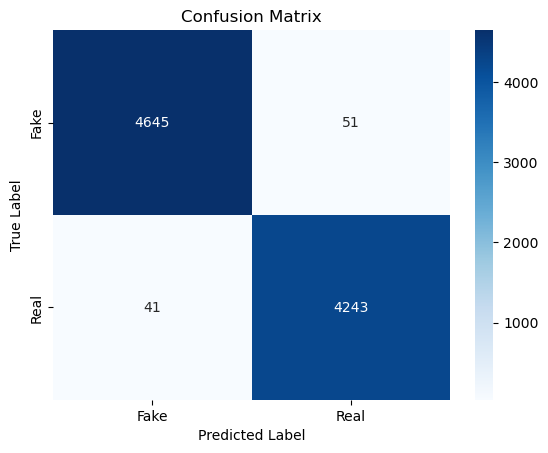

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4696
           1       0.99      0.99      0.99      4284

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980



In [56]:
# Predict on test data
y_pred = model.predict(X_test)

# Check accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Fake', 'Real'], yticklabels=['Fake', 'Real'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# Classification Report
print(classification_report(y_test, y_pred))


In [57]:
#Let's test with a custom news headline!
def predict_news(news):
    news = preprocess_text(news)  # Preprocess input
    news_tfidf = vectorizer.transform([news]).toarray()  # Convert to numerical form
    prediction = model.predict(news_tfidf)[0]  # Predict (0 = Fake, 1 = Real)
    return "Real News" if prediction == 1 else "Fake News"

# Example test
sample_news = "Breaking: Scientists discover new vaccine for COVID-19."
print(predict_news(sample_news))


Fake News


In [58]:
sample_news = "DOVER AIR FORCE BASE, Del. (Reuters) - The U....		."
print(predict_news(sample_news))


Real News
